### Подготовка

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.simplefilter("ignore")

In [33]:
df = pd.read_csv('homework_m2.csv', index_col=0)

In [35]:
daily_stats = df.groupby(['event_date','event_month'], as_index=False)\
    .apply(func = lambda df_gr: pd.Series({
        'visits': df_gr[df_gr['event_name']=='visit'].event_id.count(),
        'choose_item': df_gr[df_gr['event_name']=='choose_item'].event_id.count(),
        'purchases': df_gr[df_gr['event_name']=='purchase'].event_id.count(),
        'users': df_gr.user_id.nunique(),
        'paying_users': df_gr[df_gr['event_name']=='purchase'].user_id.nunique(),
        'revenue': df_gr.amount.sum()
    }))

In [37]:
daily_stats.head()

,event_date,event_month,visits,choose_item,purchases,users,paying_users,revenue
0,2022-04-01,2022-04-01,1483,69,10,1238,10,12670
1,2022-04-02,2022-04-01,1469,61,4,1217,4,5068
2,2022-04-03,2022-04-01,1504,67,6,1243,6,7602
3,2022-04-04,2022-04-01,1416,74,6,1194,6,7602
4,2022-04-05,2022-04-01,1450,54,3,1219,3,3801


### Денежные метрики

- Выручка = сумма цен всех покупок
- Средний чек = выручка / количество покупок
- ARPPU = выручка / количество платящих пользователей

event_month
2022-04-01    Axes(0.125,0.11;0.775x0.77)
2022-05-01    Axes(0.125,0.11;0.775x0.77)
2022-06-01    Axes(0.125,0.11;0.775x0.77)
2022-07-01    Axes(0.125,0.11;0.775x0.77)
2022-08-01    Axes(0.125,0.11;0.775x0.77)
2022-09-01    Axes(0.125,0.11;0.775x0.77)
2022-10-01    Axes(0.125,0.11;0.775x0.77)
2022-11-01    Axes(0.125,0.11;0.775x0.77)
2022-12-01    Axes(0.125,0.11;0.775x0.77)
dtype: object

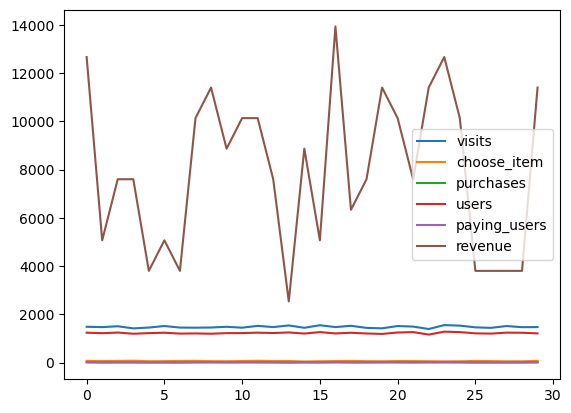

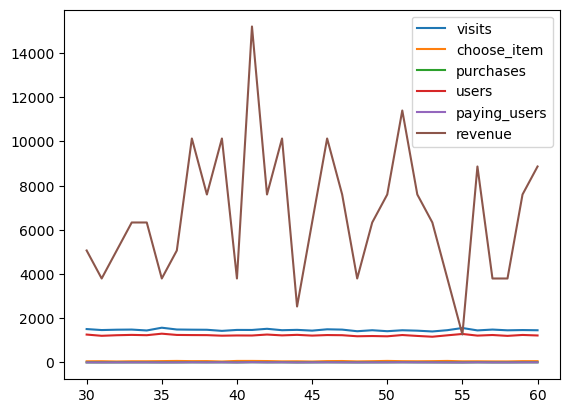

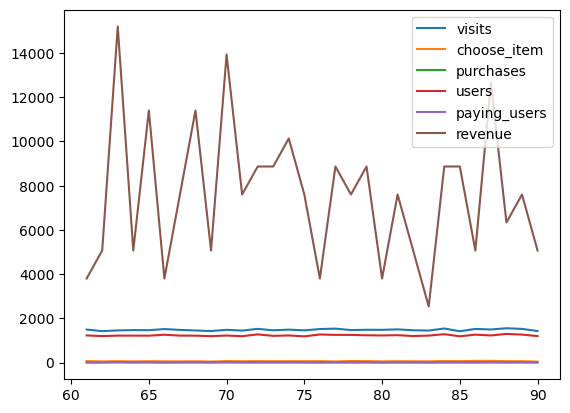

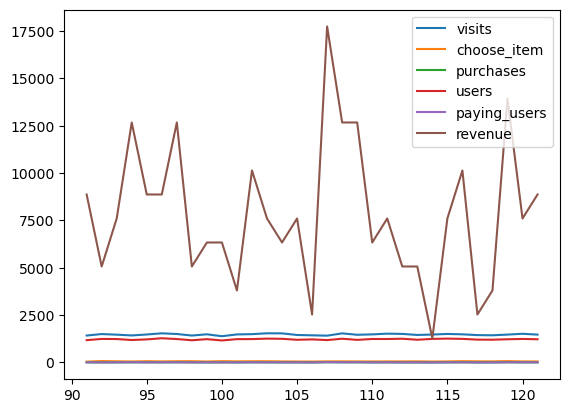

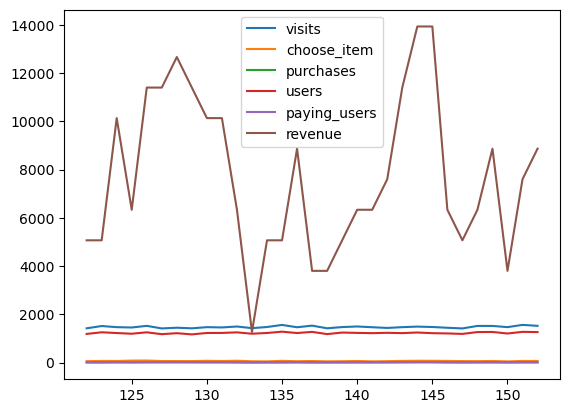

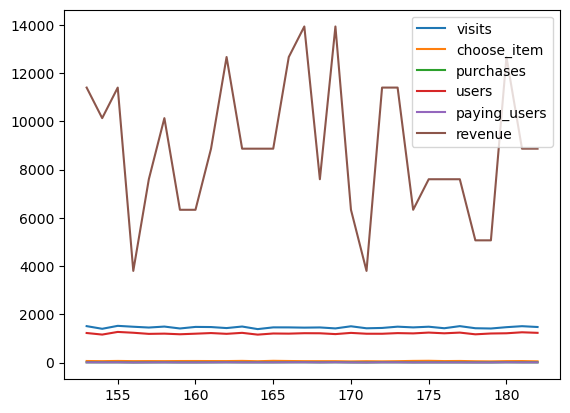

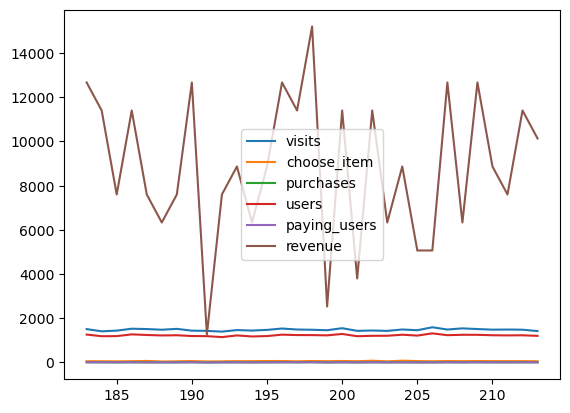

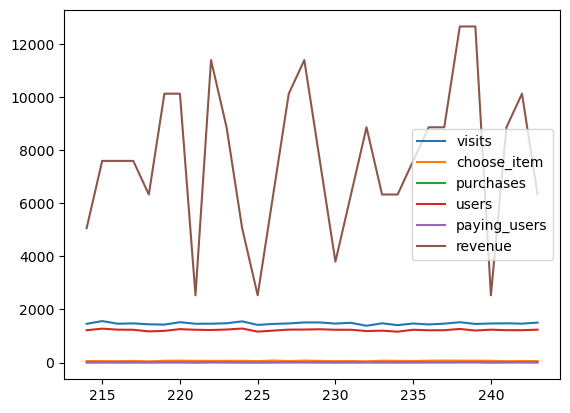

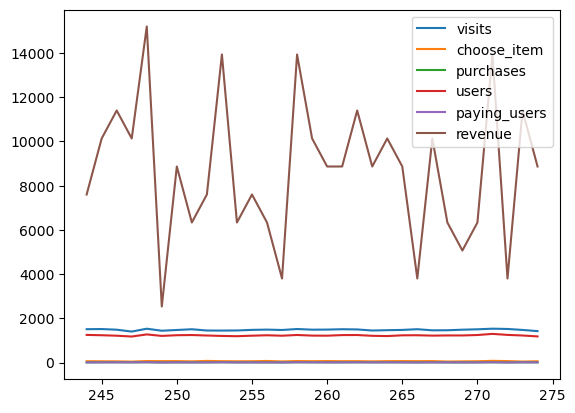

In [41]:
# выручка по месяцам
revenue = daily_stats.groupby('event_month')
revenue.plot()

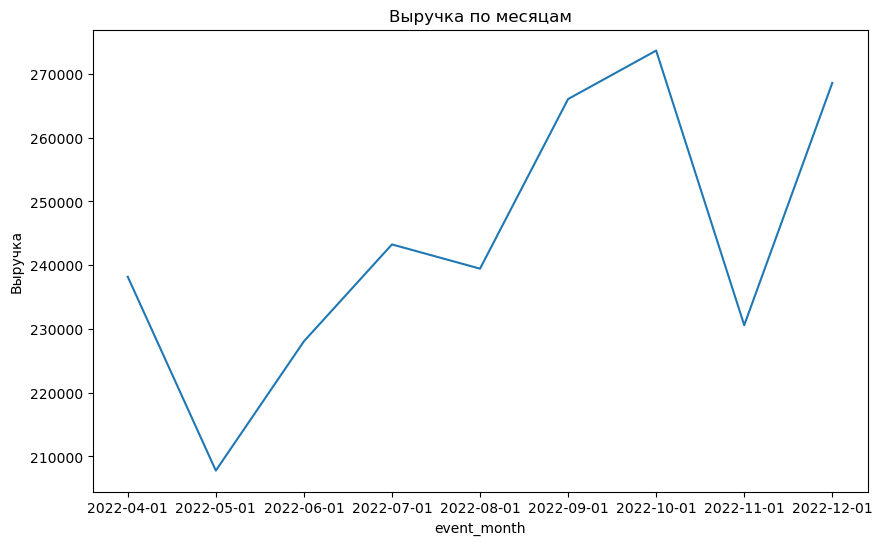

In [43]:
# Выручка по месяцам
revenue = daily_stats.groupby('event_month')['revenue'].sum()
revenue.plot(title='Выручка по месяцам', figsize=(10, 6))
plt.ylabel('Выручка')
plt.show()

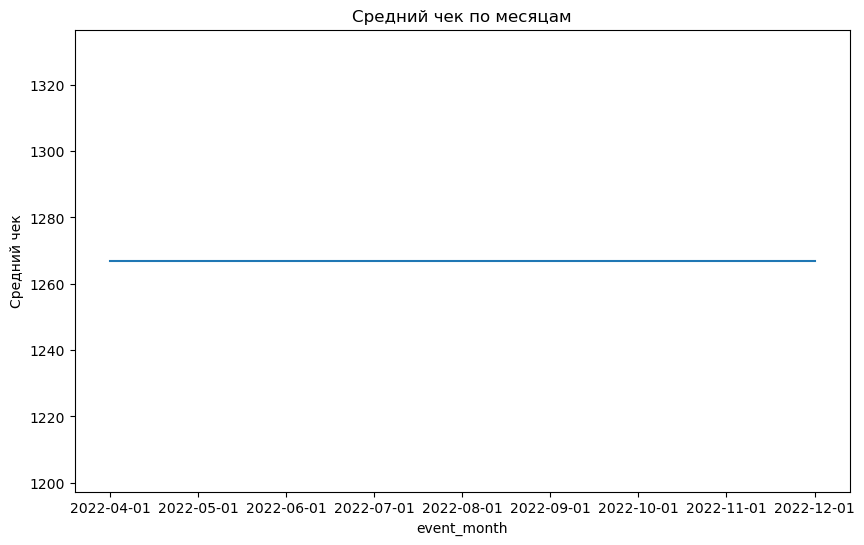

In [45]:
# средний чек по месяцам
purchases = daily_stats.groupby('event_month')['purchases'].sum()
mean_check = revenue / purchases
mean_check.plot(title='Средний чек по месяцам', figsize=(10, 6))
plt.ylabel('Средний чек')
plt.show()

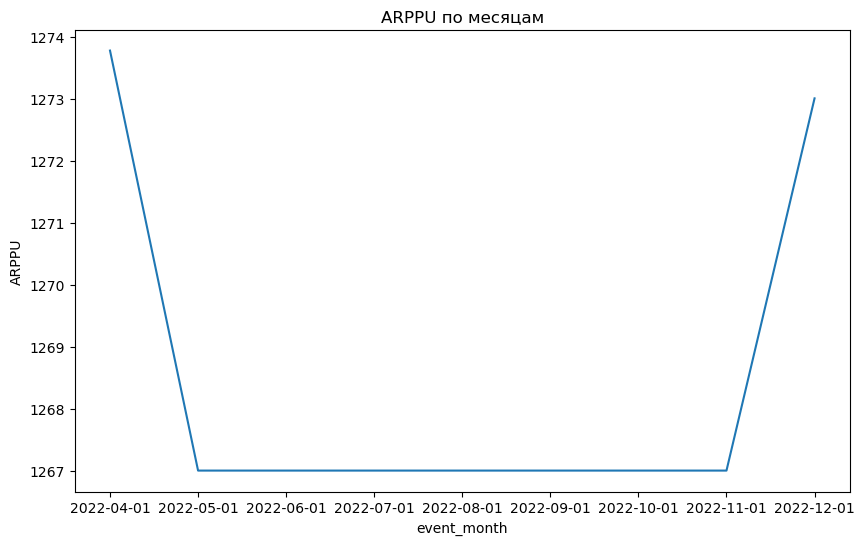

In [47]:
# ARPPU по месяцам
paying_users = daily_stats.groupby('event_month')['paying_users'].sum()
arppu = revenue / paying_users
arppu.plot(title='ARPPU по месяцам', figsize=(10, 6))
plt.ylabel('ARPPU')
plt.show()

### Конверсии

$$
Конверсия = {Количество \;  пользователей \;   с \;   целевым \;   действием \over Общее \;   число \;   пользователей} * 100%
$$

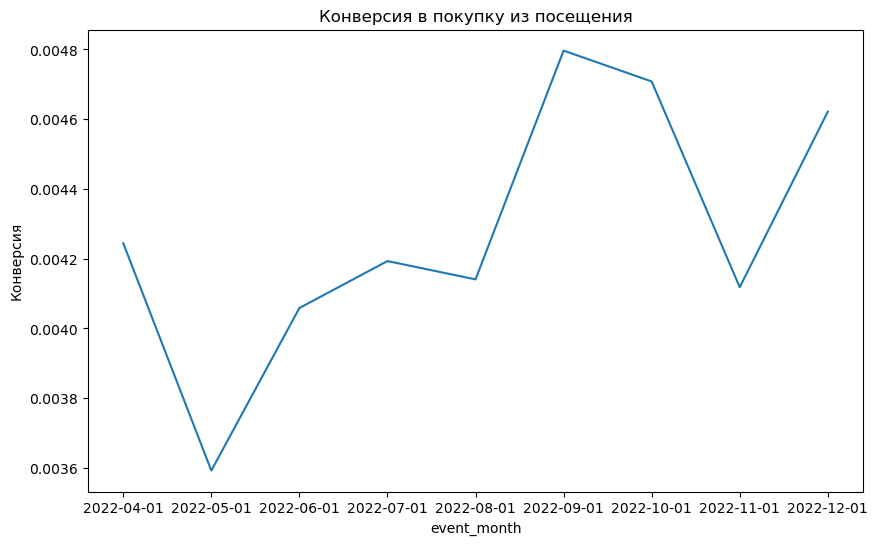

In [49]:
# # конверсия в покупку сквозная
purchase_events = df[df['event_name'] == 'purchase'].groupby('event_month')['event_id'].count()
visit_events = df[df['event_name'] == 'visit'].groupby('event_month')['event_id'].count()
conversion_purchase = purchase_events / visit_events
conversion_purchase.plot(title='Конверсия в покупку из посещения', figsize=(10, 6))
plt.ylabel('Конверсия')
plt.show()

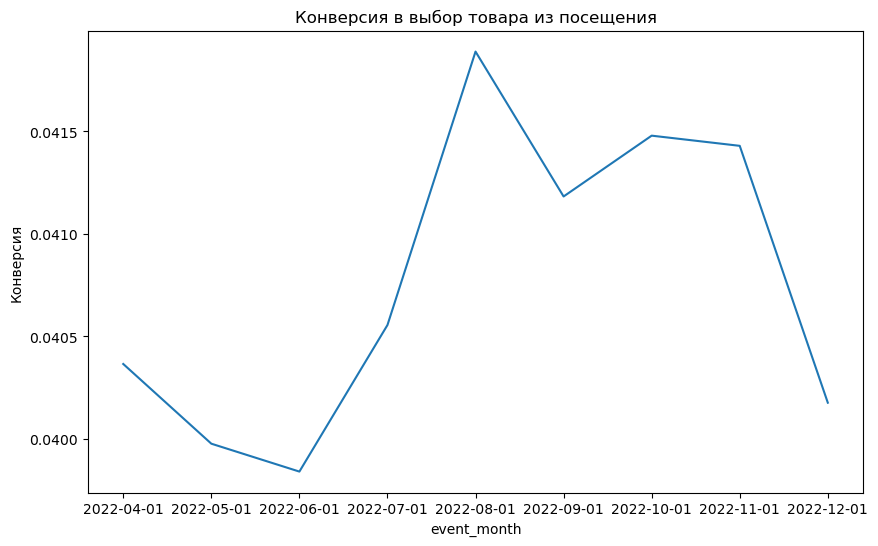

In [51]:
# конверсия в выбор товара из каталога
choose_events = df[df['event_name'] == 'choose_item'].groupby('event_month')['event_id'].count()
conversion_choose = choose_events / visit_events
conversion_choose.plot(title='Конверсия в выбор товара из посещения', figsize=(10, 6))
plt.ylabel('Конверсия')
plt.show()

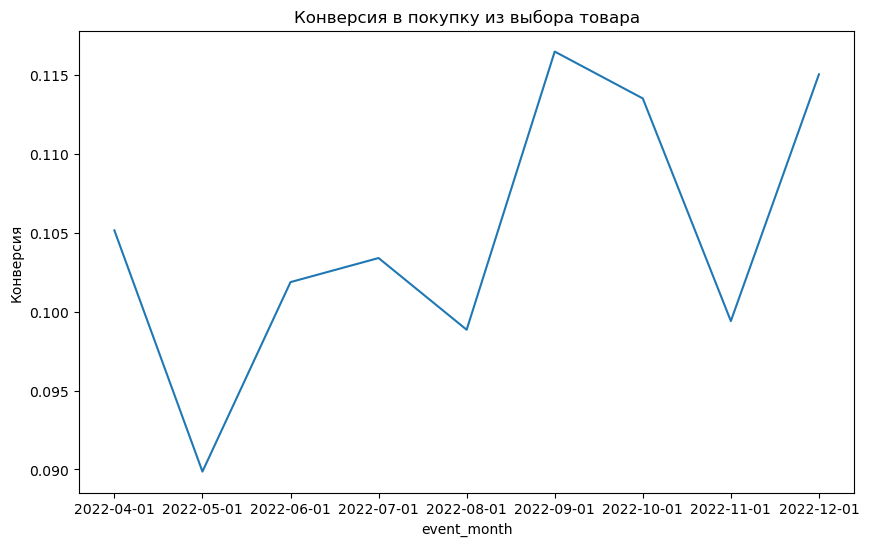

In [53]:
# конверсия в покупку из каталога
conversion_purchase_from_choose = purchase_events / choose_events
conversion_purchase_from_choose.plot(title='Конверсия в покупку из выбора товара', figsize=(10, 6))
plt.ylabel('Конверсия')
plt.show()

### Метрики вовлечения

- DAU - количество активных пользователей в день
- MAU - количество активных пользователей в месяц

In [55]:
df.head()

,event_id,user_id,event_datetime,event_date,event_month,event_name,amount
0,0,6ef47377-99ce-410d-ad94-f8a6765f0ce7,2022-04-01 00:00:56,2022-04-01,2022-04-01,visit,0
1,1,4e3e125e-d65b-4ca2-b31d-3aec55f1a694,2022-04-01 00:05:11,2022-04-01,2022-04-01,visit,0
2,2,bd30261f-2895-4526-a5be-7b45a86c65c9,2022-04-01 00:05:24,2022-04-01,2022-04-01,visit,0
3,3,f0264aad-bbe1-4c60-8907-fc862fd972cf,2022-04-01 00:06:38,2022-04-01,2022-04-01,visit,0
4,4,88a53750-6cb6-40fd-b115-71bd183ef462,2022-04-01 00:06:59,2022-04-01,2022-04-01,visit,0


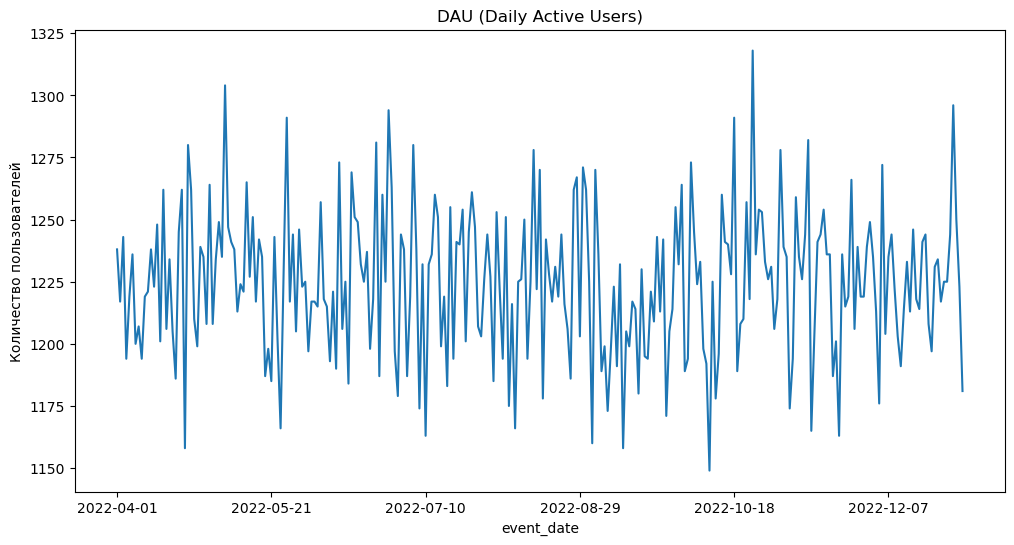

In [57]:
# DAU
dau = df.groupby('event_date')['user_id'].nunique()
dau.plot(title='DAU (Daily Active Users)', figsize=(12, 6))
plt.ylabel('Количество пользователей')
plt.show()

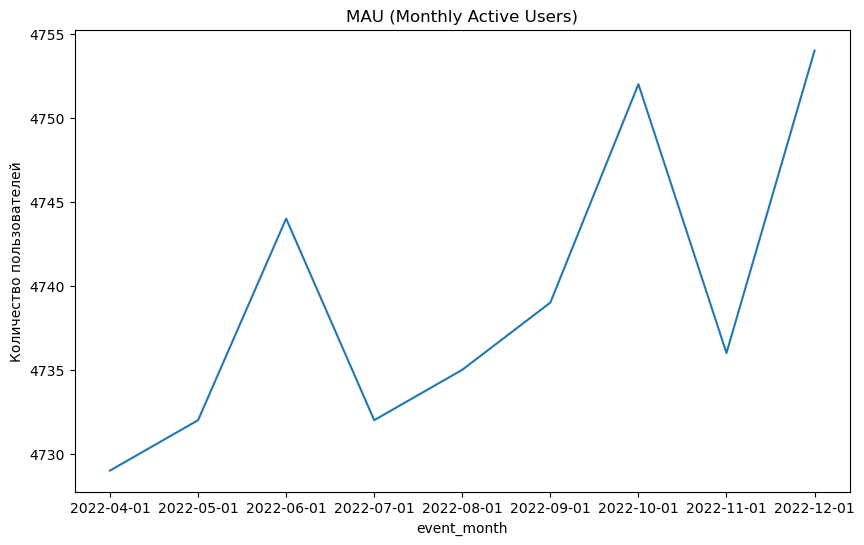

In [59]:
# MAU
mau = df.groupby('event_month')['user_id'].nunique()
mau.plot(title='MAU (Monthly Active Users)', figsize=(10, 6))
plt.ylabel('Количество пользователей')
plt.show()

### Метрики удержания

$$
Retention = {Количество \;  пользователей \; за \; период \;  -  \; Количество \; новых \; пользователей \over Количество \;   пользователей \; в \; начальный \; период } * 100%
$$

In [65]:
# Преобразование дат в datetime формат
df['event_date'] = pd.to_datetime(df['event_date'])

In [67]:
# вычислить дату первого взаимодействия с продуктом для каждого пользователя
first_online = df.groupby('user_id')['event_date'].min().reset_index()
first_online.rename(columns={'event_date': 'first_online_day'}, inplace=True)

In [71]:
# присоединить таблицу с датой первого взаимодействия с продуктом с основной таблицей
df_merged = df.merge(
    first_online,
    how='inner',
    on='user_id')

In [73]:
# добавить колонки с расчетом порядкового дня и месяца использования продукта
df_merged['lt_day'] = (df_merged['event_date'] - df_merged['first_online_day']).dt.days
df_merged['lt_month'] = (df_merged['event_date'] - df_merged['first_online_day']).dt.days // 30

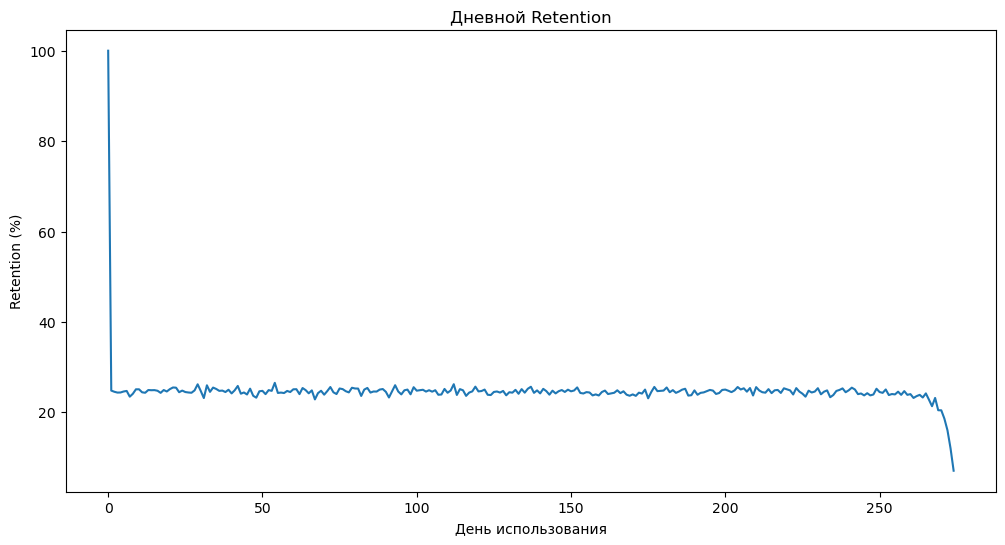

In [75]:
# дневной Retention
daily_retention = df_merged.groupby('lt_day')['user_id'].nunique() / df_merged['user_id'].nunique() * 100
daily_retention.plot(title='Дневной Retention', figsize=(12, 6))
plt.xlabel('День использования')
plt.ylabel('Retention (%)')
plt.show()

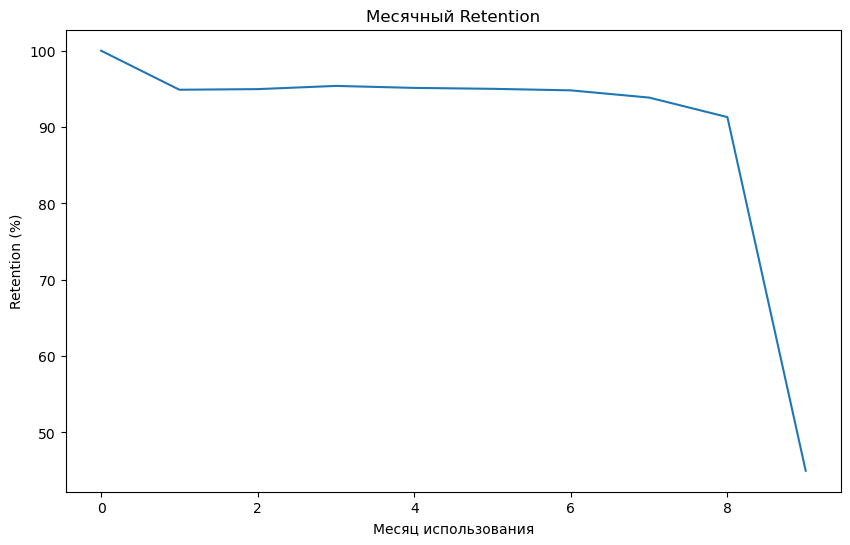

In [77]:
# месячный Retention
monthly_retention = df_merged.groupby('lt_month')['user_id'].nunique() / df_merged['user_id'].nunique() * 100
monthly_retention.plot(title='Месячный Retention', figsize=(10, 6))
plt.xlabel('Месяц использования')
plt.ylabel('Retention (%)')
plt.show()